<a href="https://colab.research.google.com/github/IlyaKo4atkov/My-machine-learning-projects/blob/main/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Условие задачи: Проведение классификации с использованием предобученной модели MobileNet

In [ ]:
from keras.applications import MobileNet
from keras import models
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras import optimizers

def model_maker():
    base_model = MobileNet(include_top=False, input_shape = (IMG_WIDTH, IMG_HEIGHT, 3))

    for layer in base_model.layers[:]:
        layer.trainable = False

    input = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(NUM_CLASSES, activation='softmax')(custom_model)

    return Model(inputs=input, outputs=predictions)

In [ ]:
model_maker.summary()

# Загрузка набора данных и обучение модели

In [ ]:
#Загрузка модели
from keras.applications import MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

<ipython-input-1-3cf3642bb09b>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "cat-and-dog" -d ./temp

import os

# Набор утилит для работы с файловой системой
import shutil
from keras import layers # импортируем слои
from keras import models # импортируем модели
from keras import optimizers  # импортируем функции оптимизации
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './temp/training_set/training_set/'

# Папка в которой будем создавать выборки
BASE_DIR = './dataset/'

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# При повторном запуске пересоздаим структуру каталогов
# Если папка существует, то удаляем ее со всеми вложенными каталогами и файлами
if os.path.exists(BASE_DIR):
    shutil.rmtree(BASE_DIR)

# Создаем папку по пути BASE_DIR
os.mkdir(BASE_DIR)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/train'
train_dir = os.path.join(BASE_DIR, 'train')

# Создаем подпапку, используя путь
os.mkdir(train_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/validation'
validation_dir = os.path.join(BASE_DIR, 'validation')

# Создаем подпапку, используя путь
os.mkdir(validation_dir)

# Сцепляем путь до папки с именем вложенной папки. Аналогично BASE_DIR + '/test'
test_dir = os.path.join(BASE_DIR, 'test')

# Создаем подпапку, используя путь
os.mkdir(test_dir)

# Функция создания подвыборок (папок с файлами)
def create_dataset(
    img_path: str,         # Путь к файлам с изображениями классов
    new_path: str,         # Путь к папке с выборками
    class_name: str,       # Имя класса (оно же и имя папки)
    start_index: int,      # Стартовый индекс изображения, с которого начинаем подвыборку
    end_index: int         # Конечный индекс изображения, до которого создаем подвыборку

):

    src_path = os.path.join(img_path, class_name)  # Полный путь к папке с изображениями класса
    dst_path = os.path.join(new_path, class_name)  # Полный путь к папке с новым датасетом класса

    # Получение списка имен файлов с изображениями текущего класса
    class_files = os.listdir(src_path)

    # Создаем подпапку, используя путь
    os.mkdir(dst_path)

    # Перебираем элементы, отобранного списка с начального по конечный индекс
    for fname in class_files[start_index : end_index]:
        # Путь к файлу (источник)
        src = os.path.join(src_path, fname)
        # Новый путь расположения файла (назначение)
        dst = os.path.join(dst_path, fname)
        # Копируем файл из источника в новое место (назначение)
        shutil.copyfile(src, dst)


for class_label in range(CLASS_COUNT):    # Перебор по всем классам по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен

    # Создаем обучающую выборку для заданного класса из диапазона (0-1000)
    create_dataset(IMAGE_PATH, train_dir, class_name, 0, 2000)
    # Создаем проверочную выборку для заданного класса из диапазона (1000-1500)
    create_dataset(IMAGE_PATH, validation_dir, class_name, 2000, 3000)
    # Создаем тестовую выборку для заданного класса из диапазона (1500-2000)
    create_dataset(IMAGE_PATH, test_dir, class_name, 3000, 4000)

--2024-09-30 21:44:22--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip     100%[===================>] 217.52M  13.8MB/s    in 18s     

2024-09-30 21:44:41 (12.0 MB/s) - ‘cat-and-dog.zip’ saved [228082266/228082266]



In [ ]:
import os                                                 # Для работы с файловой системой
import numpy as np                                        # Работа с матрицами
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Импортируем генератор изображений

datagen = ImageDataGenerator(rescale=1./255) # Задаем генератор и нормализуем данные делением на 255
batch_size = 20 # Размер батча (20 изображений)


# Функция извлечения признаков
def extract_features(directory, sample_count):
    # определяем размерность признаков, заполняем нулями
    features = np.zeros(shape=(sample_count, 4, 4, 1024))
    # определяем размерность выходных меток, заполняем нулями
    labels = np.zeros(shape=(sample_count))

    # генерируем данные из папки
    generator = datagen.flow_from_directory(
        directory,                # путь к папке
        target_size=(150, 150),   # изменить картинки до размера 150 х 150
        batch_size=batch_size,    # размер пакета
        class_mode='binary'       # задача бинарной классификации
    )
    i = 0
    for inputs_batch, labels_batch in generator: # в цикле пошагово генерируем пакет с картинками и пакет из меток
        features_batch = base_model.predict(inputs_batch, verbose=0) # делаем предсказание на сгенерируемом пакете
        features[i * batch_size : (i + 1) * batch_size] = features_batch # складываем пакеты с признаками пачками в массив с признаками

        labels[i * batch_size : (i + 1) * batch_size] = labels_batch     # складываем пакеты с метками в массив с метками
        i += 1

        if i * batch_size >= sample_count: # Прерываем генерацию, когда выходим за число желаемых примеров
            break

    return features, labels # возвращаем кортеж (признаки, метки)

# Извлекаем (признаки, метки) для обучающей выборки, 2000 образцов
train_features, train_labels = extract_features(train_dir, 2000)

# Извлекаем (признаки, метки) для проверочной выборки, 1000 образцов
validation_features, validation_labels = extract_features(validation_dir, 3000)

# Извлекаем (признаки, метки) для тестовой выборки, 1000 образцов
test_features, test_labels = extract_features(test_dir, 3000)

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 1024))              # приводим к форме (образцы, 16384) обучающие признаки
validation_features = np.reshape(validation_features, (3000, 4 * 4 * 1024))    # приводим к форме (образцы, 16384) проверочные признаки
test_features = np.reshape(test_features, (3000, 4 * 4 * 1024))                # приводим к форме (образцы, 16384) тестовые признаки

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizers import Adam
model = models.Sequential()

# изменяем размерность входа в соответствии с входной формой массива
model.add(layers.Input(shape=(4 * 4 * 1024,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5)) # Добавим прореживание для борьбы с переобучением
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    optimizer=optimizers.Adam(learning_rate=2e-5), # согласно условию задачи необходимо использовать оптимизатор Adam
    loss='binary_crossentropy',
    metrics=['acc']
)

# Обучаем модель на извлеченных признаках
history = model.fit(
    train_features, train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels)
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - acc: 0.7842 - loss: 0.6781 - val_acc: 0.9550 - val_loss: 0.1356
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - acc: 0.9524 - loss: 0.1443 - val_acc: 0.9553 - val_loss: 0.1222
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - acc: 0.9644 - loss: 0.0812 - val_acc: 0.9567 - val_loss: 0.1174
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - acc: 0.9781 - loss: 0.0492 - val_acc: 0.9607 - val_loss: 0.1106
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - acc: 0.9927 - loss: 0.0293 - val_acc: 0.9613 - val_loss: 0.1291
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - acc: 0.9898 - loss: 0.0251 - val_acc: 0.9630 - val_loss: 0.1138
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - acc: 0.9920 - loss: 0.0169 - val_acc: 0.9640 - val_loss: 0.1126
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - acc: 0.9943 - loss: 0.0126 - val_acc: 0.9660 - val_loss: 0.1185
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 5

### Выделение признаков с расширение данных

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Input(shape=(150, 150, 3)))
model.add(base_model) # используем MobileNet
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print('Число обучаемых весов до заморозки:', len(model.trainable_weights))

# замораживаем веса модели
base_model.trainable = False

print('Число обучаемых весов после заморозки:', len(model.trainable_weights))

Число обучаемых весов до заморозки: 85
Число обучаемых весов после заморозки: 4


### Проведем аугментацию

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

# генератор для обучающей выборки
train_datagen = ImageDataGenerator(
    rescale=1./255,           # нормализация данных
    rotation_range=40,        # поворот 40 градусов
    width_shift_range=0.2,    # смещенние изображения по горизонтали
    height_shift_range=0.2,   # смещенние изображения по вертикали
    shear_range=0.2,          # случайный сдвиг
    zoom_range=0.2,           # случайное масштабирование
    horizontal_flip=True,     # отражение по горизонтали
    fill_mode='nearest'       # стратегия заполнения пустых пикселей при трансформации
)
# генератор для проверочной выборки
test_datagen = ImageDataGenerator(rescale=1./255)

# генерация картинок из папки для обучающей выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# генерация картинок из папки для проверочной выборки
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# компиляция модели
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=2e-5),
    metrics=['acc']
)

# обучаем модель
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)


Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 148s 719ms/step - acc: 0.8096 - loss: 0.5075 - val_acc: 0.9550 - val_loss: 0.1277
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 134s 663ms/step - acc: 0.9189 - loss: 0.1929 - val_acc: 0.9555 - val_loss: 0.1256
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 128s 597ms/step - acc: 0.9441 - loss: 0.1324 - val_acc: 0.9575 - val_loss: 0.1205
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 141s 595ms/step - acc: 0.9471 - loss: 0.1174 - val_acc: 0.9600 - val_loss: 0.1097
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 121s 602ms/step - acc: 0.9428 - loss: 0.1422 - val_acc: 0.9675 - val_loss: 0.0951
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 118s 582ms/step - acc: 0.9454 - loss: 0.1259 - val_acc: 0.9660 - val_loss: 0.1016
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 118s 584ms/step - acc: 0.9461 - loss: 0.1185 - val_acc: 0.9675 - val_loss: 0.0943
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 119s 587ms/step - acc: 0.9572 - loss: 0.1043 - val_acc: 0.9675 - val_loss: 0.0987
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt
# Рисуем графики
def show_history(store):
    acc = store.history['acc']
    val_acc = store.history['val_acc']
    loss = store.history['loss']
    val_loss = store.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'b', label='Точность на контрольной выборке')
    plt.title('График точности на контрольной и обучающей выборках')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'b', label='Потери на контрольной выборке')
    plt.title('График потерь на контрольной и обучающей выборках')
    plt.legend()
    plt.show()

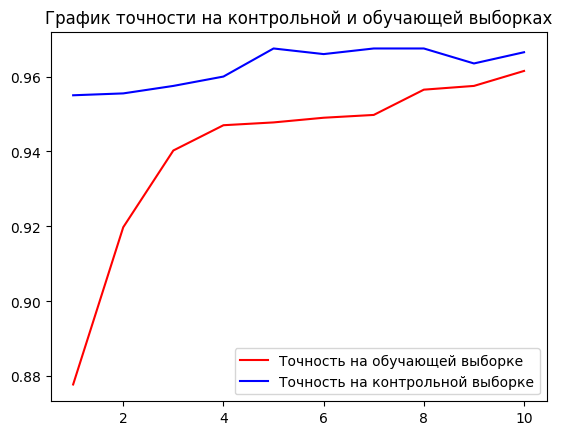

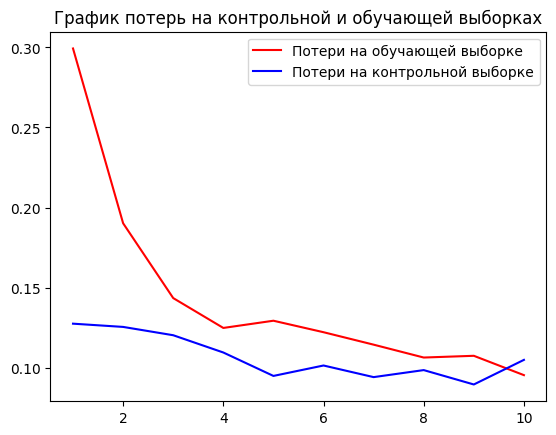

In [ ]:
show_history(history)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Точность на контрольной выборке:', test_acc)

Found 2000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 362ms/step - acc: 0.9672 - loss: 0.0789
Точность на контрольной выборке: 0.9649999737739563
